In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

df = pd.read_csv('cacao_flavors.csv')
df

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [3]:
df = df.dropna()
df

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


## Выявить наличие ошибочных данных

В качестве зависимого признака выступает стоимость квартиры Y (цена квартиры, руб). В качестве независимых выбраны следующие:

2. full_sq — общая площадь;+
3. life_sq — жилая площадь;+
4. floor — этаж;-
5. sub_area — служебные площади;-
6. preschool_quota — дошкольные образовательные центры;- 
7. preschool_education_centers_raion — районные дошкольные образовательные центры;+
8. school_quota — школы;-
9. school_education_centers_raion — районные школы;+
10. school_education_centers_top_20_raion — рейтинг районных школ;-
11. hospital_beds_raion — районные больницы;-
12. healthcare_centers_raion — районные центры здоровья;-
13. university_top_20_raion — рейтинг районных институтов;-
14. sport_objects_raion — районные спортивные объекты;+
15. additional_education_raion — дополнительные районные образовательные учереждения;-
16. culture_objects_top_25_raion — рейтинг районных культурных объектов;-
17. shopping_centers_raion — районные шоппинг центров;-
18. office_raion — районные учереждения;-
19. metro_min_avto — время до метро на машине;+
20. metro_km_avto — расстояние до метро на машине;+
21. metro_min_walk — время до метро пешком;+
22.  metro_km_walk  — расстояние до метро пешком;+
23. kindergarten_km — расстояние до детского сада;+
24. school_km — расстояние до школы;+
25. park_km — расстояние до парка;+
26.  green_zone_km — расстояние до зеленой зоны;-
27.  industrial_km — расстояние до промышленного предприятия;-
28. railroad_station_walk_km — расстояние до станции;+
29. railroad_station_walk_min — минимальное расстояние до станции;+
30. public_transport_station_km — расстояние до остановки общественного транспорта;+
31. public_transport_station_min_walk — минимальное расстояние до остановки общественного транспорта;+
32. mkad_km — расстояние до МКАДа;+
33. ttk_km — расстояние до ТРК;-
34. sadovoe_km — расстояние до Садового кольца;+
35. bulvar_ring_km — расстояние до Бульварного кольца;+
36. kremlin_km — расстояние до Кремля;+
37. big_market_km — расстояние до крупного рынка;+
38. market_shop_km — расстояние до рынка;+
39. fitness_km — расстояние до фитнеса;+
40. swim_pool_km — расстояние до бассейна;-
41. ice_rink_km — расстояние до катка;+
42. stadium_km — расстояние до стадиона;+
43. basketball_km — расстояние до секции баскетбола;-
44. hospice_morgue_km — расстояние до хосписа;+
45. university_km — расстояние до университета;-
46. workplaces_km — расстояние до работы;-
47. shopping_centers_km — расстояние до торгового центра;+
48. office_km — расстояние до офиса;-
49. additional_education_km — расстояние до центра доп.образования;+
50. preschool_km — расстояние до дошкольного учреждения;+
51. big_church_km — расстояние до церкви;-
52. church_synagogue_km — расстояние до синагоги;+
53. theater_km — расстояние до театра;-
54. museum_km — расстояние до театра;-
55. ecology  эколология;-

Следует отметить, что переменные, Y, X2 — X4 непрерывные, X1, X5, X8 — категориальные переменные.

Задача работы состоит в построении уравнения множественной регрессии для предложенных данных в виде:
$$Y=f(X_1,X_2,X_3,...,X_{54})$$

Исследуя распределение значиний каждого столбца, выяснили что некотороые данные не подчиняются нормальному закону распределения, поэтому мы исключаем их из выборки. Далее строим попарную корреляционную матрицу для дальнейшего исследования выбросов данных.

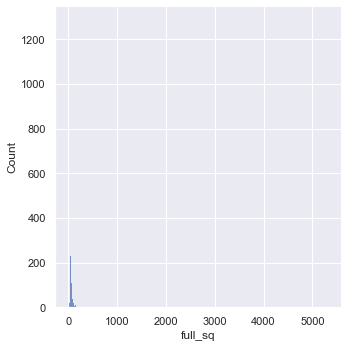

In [15]:
sns.set()
sns.displot(df['full_sq'])

In [4]:
df_cut = df[["full_sq","life_sq","preschool_education_centers_raion","school_education_centers_raion",
             "sport_objects_raion","metro_min_avto","metro_km_avto","metro_min_walk","metro_km_walk",
             "kindergarten_km","school_km","park_km","railroad_station_walk_km","railroad_station_walk_min",
             "public_transport_station_km","public_transport_station_min_walk","mkad_km","sadovoe_km",
             "bulvar_ring_km","kremlin_km","big_market_km","market_shop_km","fitness_km","ice_rink_km","stadium_km",
             "hospice_morgue_km","shopping_centers_km","additional_education_km","preschool_km","church_synagogue_km",
            "price_doc"]].copy()
df_cut

,full_sq,life_sq,preschool_education_centers_raion,school_education_centers_raion,sport_objects_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,...,market_shop_km,fitness_km,ice_rink_km,stadium_km,hospice_morgue_km,shopping_centers_km,additional_education_km,preschool_km,church_synagogue_km,price_doc
0,43,27.0,5,5,7,2.590241,1.131260,13.575119,1.131260,0.145700,...,1.676258,0.485841,1.107594,8.148591,2.392353,0.648488,0.947962,0.177975,0.628187,5850000
1,34,19.0,5,8,6,0.936700,0.647337,7.620630,0.635053,0.147754,...,3.424716,0.668364,8.972823,6.127073,2.543747,0.519311,1.072315,0.273345,0.471447,6000000
2,43,29.0,4,7,5,2.120999,1.637996,17.351515,1.445960,0.049102,...,1.375443,0.733101,1.978517,0.767569,0.621357,1.486533,0.391957,0.158072,0.755946,5700000
4,77,77.0,7,9,25,1.257186,0.876620,8.266305,0.688859,0.247901,...,1.969738,0.220288,3.975401,3.610754,1.864637,0.429052,0.810801,0.376838,0.121681,16331452
6,25,14.0,5,5,17,1.453762,1.026916,12.322993,1.026916,0.501166,...,1.825870,0.132256,1.733264,1.877747,0.198894,0.513689,0.273019,0.516979,0.318230,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,56,29.0,5,5,1,2.622565,1.580238,8.510351,0.709196,0.225720,...,0.293278,1.003262,7.261430,5.830524,2.046936,0.232778,0.648281,0.193474,2.040548,12000000
30462,56,51.0,1,2,4,0.815305,0.652244,7.447930,0.620661,0.414927,...,2.929117,0.378930,2.057277,4.650307,0.972930,0.187828,0.510751,0.566309,0.532268,10262010
30465,86,59.0,4,4,29,1.060577,0.781217,9.374609,0.781217,0.276256,...,1.825643,0.398831,2.896280,2.965732,0.951754,0.540003,0.086552,0.362681,0.310021,25000000
30467,64,32.0,6,8,11,3.377814,2.047312,24.567748,2.047312,0.203020,...,2.711199,0.412813,2.630674,2.374106,1.625064,1.108672,1.340017,0.130667,0.476021,13500000


<Axes:>

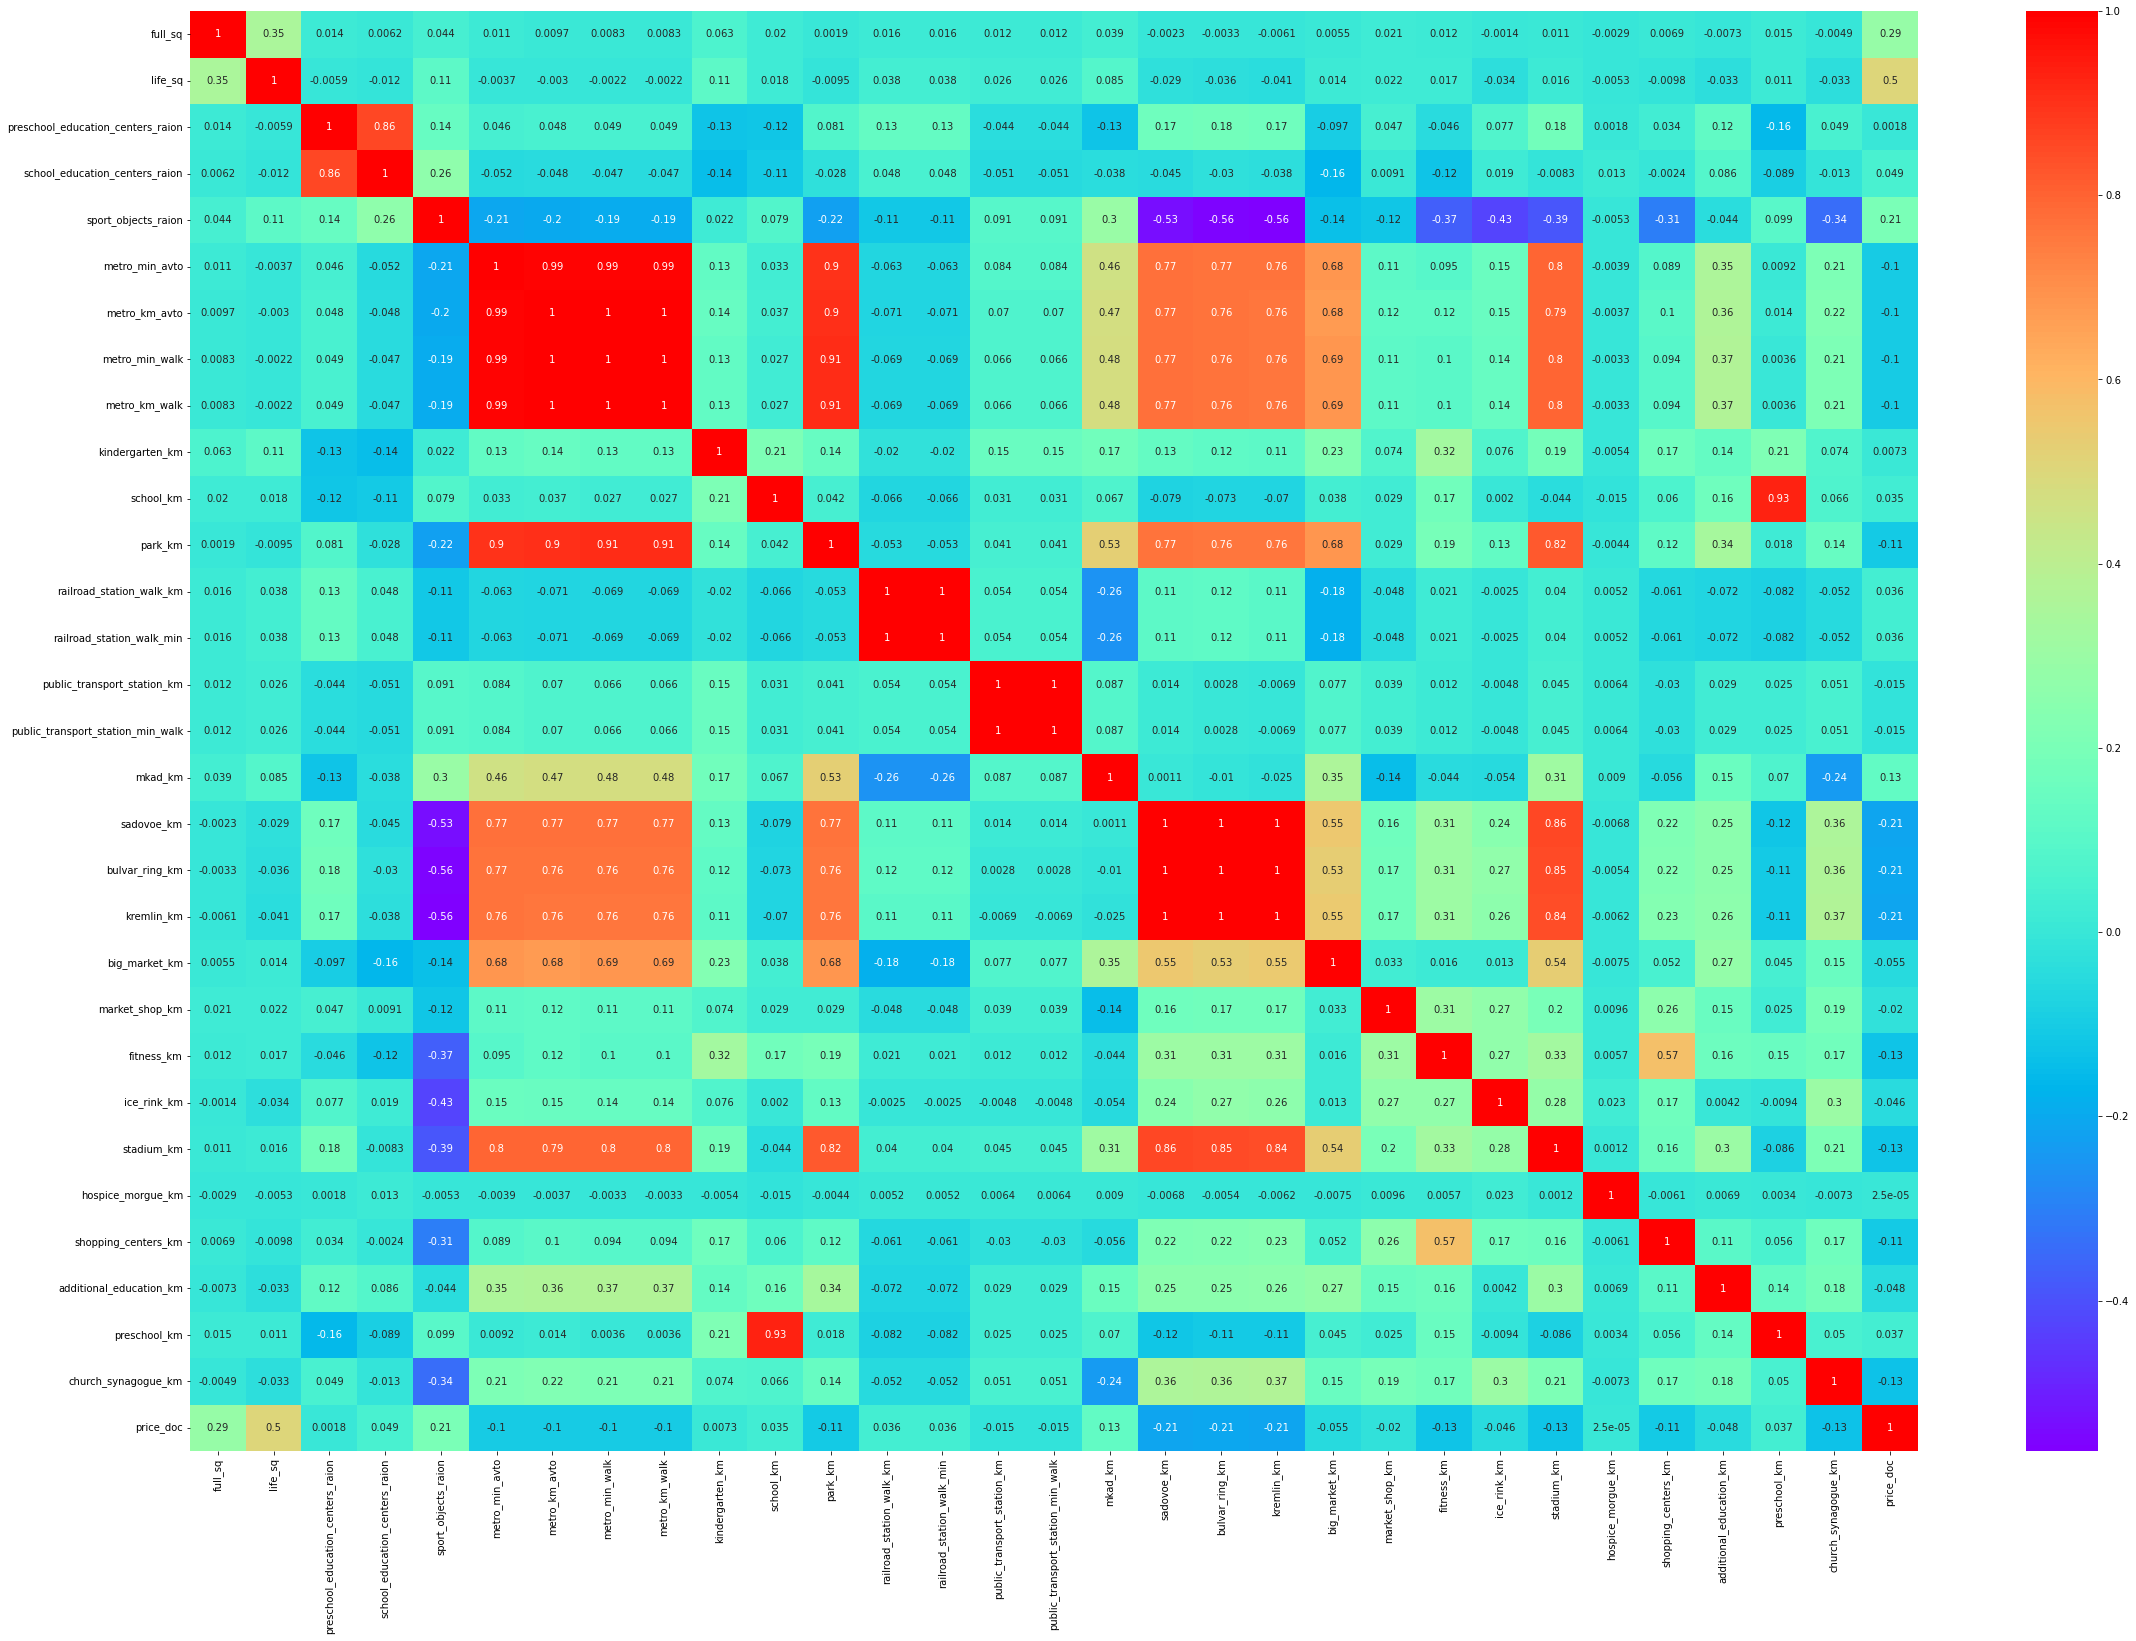

In [5]:
correlation = df_cut.corr()
fig = plt.figure()
axes = fig.add_axes([0,0,5,5])
sns.heatmap(correlation, annot=True, cmap='rainbow')

In [6]:
np.linalg.matrix_rank(correlation)

28

In [7]:
np.linalg.det(correlation)

-8.510628290780297e-58

По получивышейся матрице видно, что требуется убрать зависящие друг от друга данные: это - metro_min_avto, metro_km_avto, metro_min_walk, metro_km_walk, park_km; 

In [8]:
df_cut = df[["full_sq","life_sq",
             "sport_objects_raion","metro_min_avto",
             "mkad_km",
             "kremlin_km","fitness_km","shopping_centers_km","stadium_km",
             "church_synagogue_km",
            "price_doc"]].copy()
df_cut

,full_sq,life_sq,sport_objects_raion,metro_min_avto,mkad_km,kremlin_km,fitness_km,shopping_centers_km,stadium_km,church_synagogue_km,price_doc
0,43,27.0,7,2.590241,1.422391,15.156211,0.485841,0.648488,8.148591,0.628187,5850000
1,34,19.0,6,0.936700,9.503405,8.698054,0.668364,0.519311,6.127073,0.471447,6000000
2,43,29.0,5,2.120999,5.604800,9.067885,0.733101,1.486533,0.767569,0.755946,5700000
4,77,77.0,25,1.257186,11.616653,2.578671,0.220288,0.429052,3.610754,0.121681,16331452
6,25,14.0,17,1.453762,8.618597,6.468719,0.132256,0.513689,1.877747,0.318230,5500000
...,...,...,...,...,...,...,...,...,...,...,...
30461,56,29.0,1,2.622565,1.486707,16.626186,1.003262,0.232778,5.830524,2.040548,12000000
30462,56,51.0,4,0.815305,5.363124,10.514468,0.378930,0.187828,4.650307,0.532268,10262010
30465,86,59.0,29,1.060577,13.100989,3.269284,0.398831,0.540003,2.965732,0.310021,25000000
30467,64,32.0,11,3.377814,2.327138,13.622569,0.412813,1.108672,2.374106,0.476021,13500000


<Axes:>

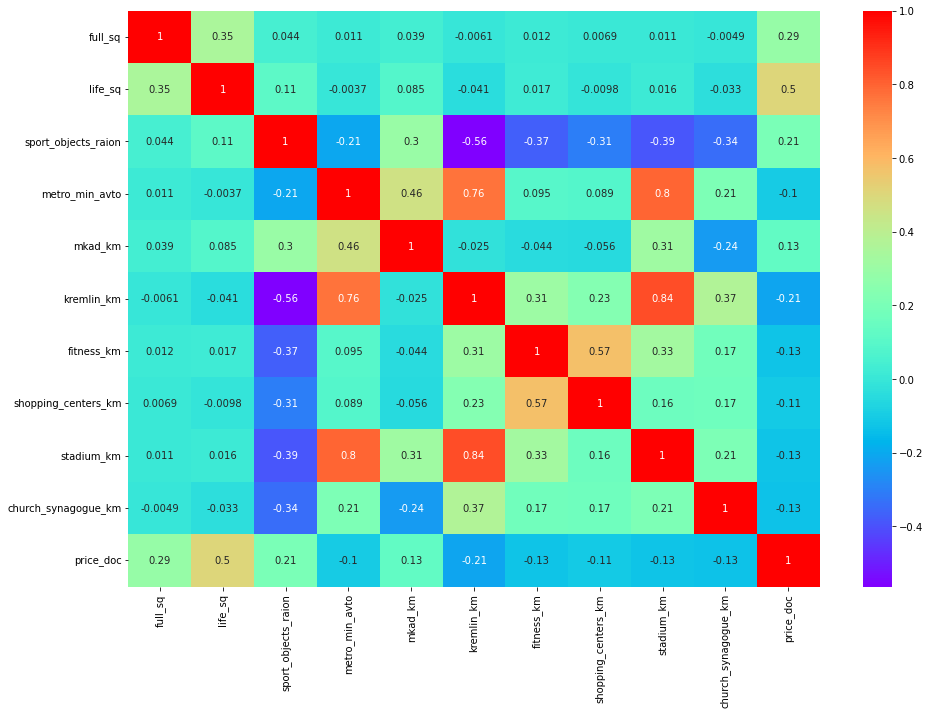

In [9]:
correlation = df_cut.corr()
fig = plt.figure()
axes = fig.add_axes([0,0,2,2])
sns.heatmap(correlation, annot=True, cmap='rainbow')

In [10]:
np.linalg.matrix_rank(correlation)

11

In [11]:
np.linalg.det(correlation)

0.00415845664671564

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df_cut.iloc[:,0:10].values
Y = df_cut.iloc[:,10].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)
print(my_model.intercept_,my_model.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))

print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

print('R_2:', metrics.r2_score(Y_test,y_pred))

4635337.874932846 [  10239.38405155  129535.52205714    3439.8884422   -26550.48497499
   93980.24797157 -110508.22765728 -712115.79411557 -134789.69964381
    6861.51310649 -259882.8599155 ]
MAE: 2789188.533963208
MSE: 26381757876418.07
R_2: 0.29691794125069515


In [28]:
X

array([[43.        , 27.        ,  7.        , ...,  0.64848764,
         8.14859077,  0.62818655],
       [34.        , 19.        ,  6.        , ...,  0.51931132,
         6.12707278,  0.47144652],
       [43.        , 29.        ,  5.        , ...,  1.48653302,
         0.76756877,  0.75594602],
       ...,
       [86.        , 59.        , 29.        , ...,  0.54000281,
         2.96573222,  0.31002056],
       [64.        , 32.        , 11.        , ...,  1.1086716 ,
         2.37410568,  0.47602088],
       [43.        , 28.        ,  7.        , ...,  0.22460143,
         3.64165629,  0.86733182]])

6700000.0
25-й перцентиль:5250000.0, 75-й перцентиль: 9100000.0, IQR: 3850000.0,  Гарницы выбросов: [-525000.0, 14875000.0].


count    1.273600e+04
mean     6.770514e+06
std      3.054684e+06
min      1.000000e+05
25%      5.100000e+06
50%      6.500000e+06
75%      8.400000e+06
max      1.485000e+07
Name: price_doc, dtype: float64

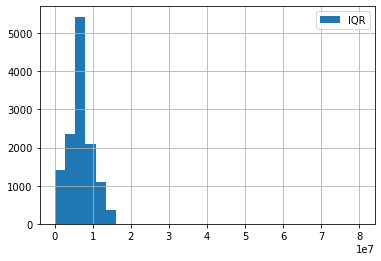

In [13]:
median = df_cut.price_doc.median()
print(median)
IQR = df_cut.price_doc.quantile(0.75, interpolation='midpoint') - df_cut.price_doc.quantile(0.25, interpolation='midpoint')
perc25 = df_cut.price_doc.quantile(0.25, interpolation='midpoint')
perc75 = df_cut.price_doc.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df_cut.price_doc.loc[df_cut.price_doc.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=30,
                                                                    range=(1e+5,8e+7),
                                                                    label='IQR')
plt.legend()
df_cut = df_cut.loc[df_cut.price_doc.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df_cut.price_doc.describe()

In [14]:
X = df_cut.iloc[:,0:10].values
Y = df_cut.iloc[:,10].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)
print(my_model.intercept_,my_model.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))

print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

print('R_2:', metrics.r2_score(Y_test,y_pred))

6273505.037948447 [   2909.45938085   48012.33698831  -31236.81489099  -40051.35287605
   44389.19661411  -45061.0936616  -411071.365728   -216257.75805989
    7514.55780977  -66484.0761289 ]
MAE: 2108057.6841243743
MSE: 8031448007010.996
R_2: 0.15343000540758012


In [19]:
len(X)

12736

In [15]:
df_cut = df[["full_sq","life_sq",
             "sport_objects_raion",
             "kremlin_km",
             "price_doc"]].copy()
df_cut

,full_sq,life_sq,sport_objects_raion,kremlin_km,price_doc
0,43,27.0,7,15.156211,5850000
1,34,19.0,6,8.698054,6000000
2,43,29.0,5,9.067885,5700000
4,77,77.0,25,2.578671,16331452
6,25,14.0,17,6.468719,5500000
...,...,...,...,...,...
30461,56,29.0,1,16.626186,12000000
30462,56,51.0,4,10.514468,10262010
30465,86,59.0,29,3.269284,25000000
30467,64,32.0,11,13.622569,13500000


<Axes:>

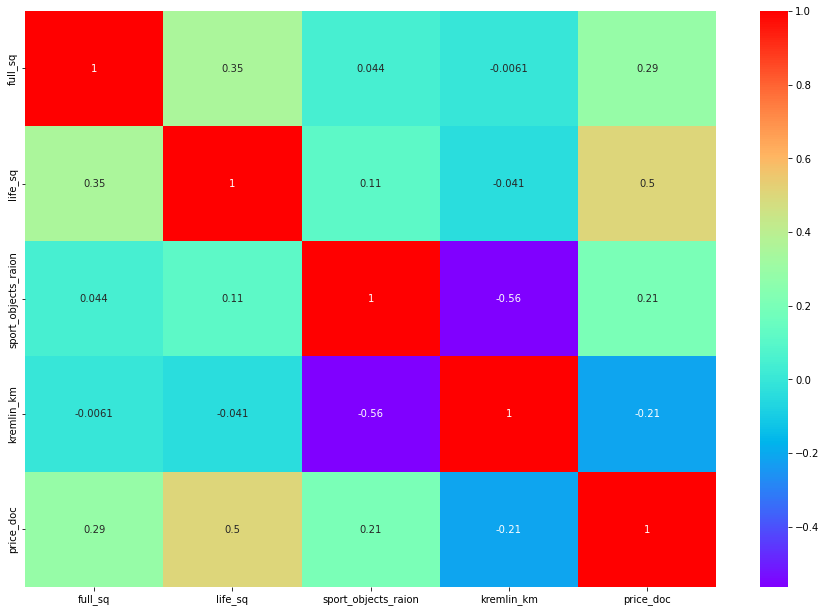

In [16]:
correlation = df_cut.corr()
fig = plt.figure()
axes = fig.add_axes([0,0,2,2])
sns.heatmap(correlation, annot=True, cmap='rainbow')

6700000.0
25-й перцентиль:5250000.0, 75-й перцентиль: 9100000.0, IQR: 3850000.0,  Гарницы выбросов: [-525000.0, 14875000.0].


count    1.273600e+04
mean     6.770514e+06
std      3.054684e+06
min      1.000000e+05
25%      5.100000e+06
50%      6.500000e+06
75%      8.400000e+06
max      1.485000e+07
Name: price_doc, dtype: float64

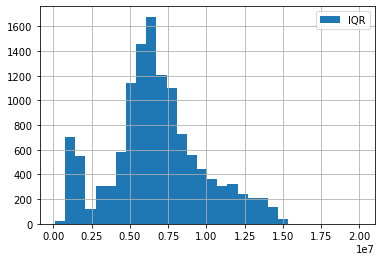

In [17]:
median = df_cut.price_doc.median()
print(median)
IQR = df_cut.price_doc.quantile(0.75, interpolation='midpoint') - df_cut.price_doc.quantile(0.25, interpolation='midpoint')
perc25 = df_cut.price_doc.quantile(0.25, interpolation='midpoint')
perc75 = df_cut.price_doc.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df_cut.price_doc.loc[df_cut.price_doc.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=30,
                                                                    range=(100000,20000000),
                                                                    label='IQR')
plt.legend()
df_cut = df_cut.loc[df_cut.price_doc.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df_cut.price_doc.describe()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df_cut.iloc[:,0:4].values
Y = df_cut.iloc[:,4].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)
print(my_model.intercept_,my_model.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))

print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

print('R_2:', metrics.r2_score(Y_test,y_pred))

5988651.062510242 [  3298.70480272  51856.61088341  -5809.9270071  -71888.46582746]
MAE: 2105834.8919098536
MSE: 7993092993899.628
R_2: 0.1331818786509401


In [29]:
df.describe(include=['bool','object'])

,sub_area,ecology
count,13652,13652
unique,83,5
top,Nekrasovka,poor
freq,585,4766


In [30]:
df.describe()

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,...,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,price_doc
count,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,...,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,1.365200e+04
mean,15019.892616,52.851084,33.052959,6.943525,2743.145327,4.723923,7324.250586,5.575593,0.076619,1254.478684,...,2.009058,0.797740,1.117135,0.941529,0.482096,1.454315,0.869255,6.818596,4.493456,7.812429e+06
std,8856.988104,50.719559,19.660150,5.017495,1459.098589,1.863767,2730.573638,2.262545,0.265995,1098.650412,...,1.712407,0.529861,1.103510,0.752640,0.304937,1.107952,0.515131,4.745916,2.986326,5.533558e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1924.000000,1.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004072,0.003270,0.073363,0.007903,1.000000e+05
25%,7578.750000,38.000000,20.000000,3.000000,1768.000000,4.000000,5519.000000,4.000000,0.000000,325.000000,...,0.844389,0.421085,0.407120,0.435445,0.269112,0.680841,0.484862,3.035458,2.042019,5.250000e+06
50%,15198.500000,45.000000,29.000000,6.000000,2508.000000,5.000000,6772.000000,5.000000,0.000000,1015.000000,...,1.458471,0.695607,0.797349,0.784777,0.420839,1.183287,0.811642,6.190388,3.786385,6.700000e+06
75%,22367.250000,61.000000,42.000000,10.000000,3494.000000,6.000000,9650.000000,7.000000,0.000000,1937.000000,...,2.693100,1.043125,1.385535,1.249251,0.632494,1.883967,1.148291,9.199073,6.814954,9.100000e+06
max,30473.000000,5326.000000,637.000000,77.000000,7610.000000,10.000000,16049.000000,13.000000,1.000000,4849.000000,...,14.503814,6.742672,8.872289,6.268740,3.064803,9.225981,15.615728,26.906043,23.057913,9.512250e+07
